In [ ]:
z# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# install OpenCV
!pip install opencv-python

# the usual ...
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [ ]:
!ls "/content/drive/My Drive/Colab Notebooks/Lec_Tut/Image feature Corner detection"

 Corners2.png  'CSC420_2020_Tutorial_B_(Taati).ipynb'   Window2.jpg
 Corners.jpg   'csc420_2020_tutorial_b_(taati).py'


In [ ]:
# read an image (make sure CavePainting.jpg is in the main folder in your Google Drive)
#img = cv2.imread('/content/drive/My Drive/Corners.jpg') # READS IN NUMPY ARRAY
#img = cv2.imread('/content/drive/My Drive/Window2.jpg') # READS IN NUMPY ARRAY
img = cv2.imread('/content/drive/My Drive/Colab Notebooks/Lec_Tut//Image feature Corner detection/Corners2.png') # READS IN NUMPY ARRAY

In [ ]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

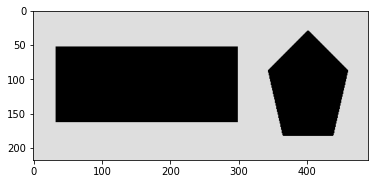

In [ ]:
plt.imshow(img)

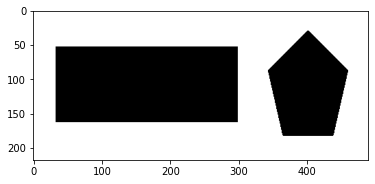

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
#gray = cv2.bitwise_not(gray)
gray = gray*1.1
plt.imshow(gray, cmap='gray')
#blur the image
blur = cv2.GaussianBlur(gray,(5,5),7)
#use Sobel filter to get imgae gradient
Ix = cv2.Sobel(blur, cv2.CV_64F, 1, 0, ksize=5)
Iy = cv2.Sobel(blur, cv2.CV_64F, 0, 1, ksize=5)


(<matplotlib.axes._subplots.AxesSubplot at 0x7f30fc943128>,
 <matplotlib.image.AxesImage at 0x7f30fc3c2cf8>)

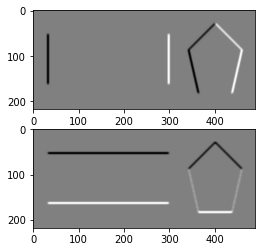

In [ ]:
plt.subplot(2,1,1), plt.imshow(Ix,cmap = 'gray')
plt.subplot(2,1,2), plt.imshow(Iy,cmap = 'gray')


In [ ]:
# don't do it this way!
cx = np.zeros(img.shape, np.uint8)
cy = np.zeros(img.shape, np.uint8)

cx[abs(Ix)>4312] = [255, 100, 120] # try thresholds of 4311 and 4312 (for Corners2.png)
cy[abs(Iy)>4312] = [255, 100, 120]
c = cv2.bitwise_and(cx, cy)
c = cv2.dilate(c, None, iterations = 3)

plt.imshow(c)

In [ ]:
# do it this way
IxIy = np.multiply(Ix, Iy)
Ix2 = np.multiply(Ix, Ix)
Iy2 = np.multiply(Iy, Iy)

In [ ]:
# GaussionBlur is weight function here, the image patch is 7x7 here.
Ix2_blur = cv2.GaussianBlur(Ix2,(7,7),10) 
Iy2_blur = cv2.GaussianBlur(Iy2,(7,7),10) 
IxIy_blur = cv2.GaussianBlur(IxIy,(7,7),10) 

(<matplotlib.axes._subplots.AxesSubplot at 0x7f30fc3b5748>,
 <matplotlib.image.AxesImage at 0x7f30fc31eef0>)

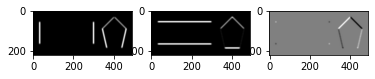

In [ ]:
plt.subplot(1,3,1), plt.imshow(Ix2_blur,cmap = 'gray')
plt.subplot(1,3,2), plt.imshow(Iy2_blur,cmap = 'gray')
plt.subplot(1,3,3), plt.imshow(IxIy_blur,cmap = 'gray')


In [ ]:
det = np.multiply(Ix2_blur, Iy2_blur) - np.multiply(IxIy_blur,IxIy_blur)
trace = Ix2_blur + Iy2_blur

In [ ]:
plt.subplot(1,2,1), plt.imshow(det,cmap = 'gray')
plt.subplot(1,2,2), plt.imshow(trace,cmap = 'gray')

In [ ]:
R = det - 0.05 * np.multiply(trace,trace)
plt.subplot(1,2,1), plt.imshow(img), plt.axis('off')
plt.subplot(1,2,2), plt.imshow(R,cmap = 'gray'), plt.axis('off')

In [ ]:
# show the original image, 
img2 = img.copy()
img2[R > 0.05 * R.max()]=[255, 255, 0] 
plt.imshow(img2)

In [ ]:
# See also:
#    cornerHarris
#    cornerEigenValsAndVecs
#    cornerSubPix
#    goodFeaturesToTrack   # finds N strongest corners in the image by Shi-Tomasi method or Harris Corner Detection (list of image points instead of image)

In [ ]:
# using cornerHarris
corners = cv2.cornerHarris(np.float32(gray),3,3,0.05)
plt.imshow(corners, cmap = 'gray')

In [ ]:
# dilate the corners 
corners = cv2.dilate(corners, None, iterations = 3) 
  
# show the original image, 
img3 = img.copy()
img3[corners > 0.05 * corners.max()]=[255, 100, 100] 
plt.imshow(img3)  